In [2]:
import pandas as pd
import numpy as np
import subprocess
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from cemba_data.utilities import get_configuration
from cemba_data.mapping import cutoff_vs_cell_remain, plot_on_plate

### In the cell below, change output_dir to the path that you demultiplexed your YAP pipeline in.

In [3]:
output_dir = ''
plate_col = 'Plate'
color_quantile = (0.025, 0.975)

# Parameters
output_dir = "/gpfs/group/jin/asun/yap/pipeline2_yap_s10/yap_demultiplex"
output_dir = pathlib.Path(output_dir)
mapping_summary = pd.read_csv(output_dir / 'stats/MappingSummary.csv.gz', index_col=0)
config = get_configuration(output_dir / 'mapping_config.ini')
gene_counts=pd.read_hdf(output_dir / 'TotalRNAData.h5', index_col=0, key='data')

In [5]:
merged_mapping = pd.merge(mapping_summary, gene_counts, left_index=True, right_index=True)

target_cols = ["Foxg1_g1", "Foxg1_g2", "Dnmt3a_g1", "Dnmt3a_g2", "Safe_g1", "Safe_g2"]

merged_mapping[target_cols] = merged_mapping[target_cols].fillna(0).astype(int)
merged_mapping["Total_grna"] = merged_mapping[target_cols].sum(axis=1)
merged_mapping[target_cols] = merged_mapping[target_cols].replace(0, np.nan)
merged_mapping["Total_grna"] = merged_mapping["Total_grna"].replace(0, np.nan)

In [6]:
def visualize_local(data, hue):
    vmax = data[hue].max()
    fig2, plate_names, plate_datas = plot_on_plate(
        data=data,
        hue=hue,
        groupby=plate_col,
        vmin=0,
        vmax=vmax,
        aggregation_func=lambda i: i.mean())
    return

### In the cell below, change hue to one of the following options depending on what you want to visualize: "Total_grna", "Foxg1_g1", "Foxg1_g2", "Dnmt3a_g1", "Dnmt3a_g2", "Safe_g1", "Safe_g2".

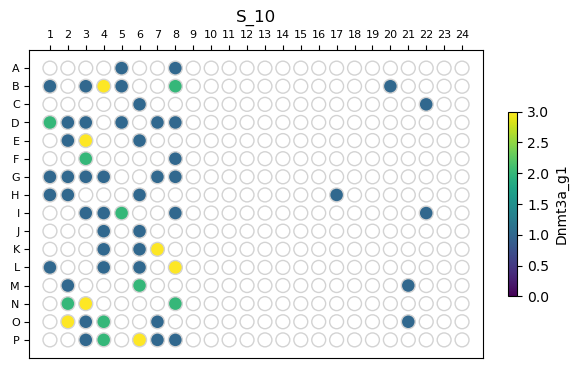

In [7]:
visualize_local(merged_mapping, hue="Dnmt3a_g1")